In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Books_Data_Clean.csv")

In [4]:
data.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [5]:
data.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [6]:
#remove outliers in publishing year like -560.... 
data=data[data["Publishing Year"]>1900]

In [7]:
data.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [8]:
#there are some NaN vals in book name and language_code 
#lets not drop  language_code  coz its 49 nan rows and removing will make lose important vals 
#but bookname if its not there remove that rows 

In [9]:
data.dropna(subset="Book Name",inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

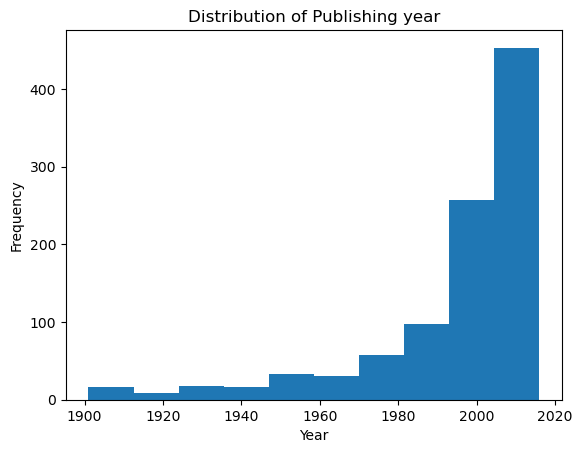

In [ ]:
plt.hist(data["Publishing Year"])
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing year")
plt.show()

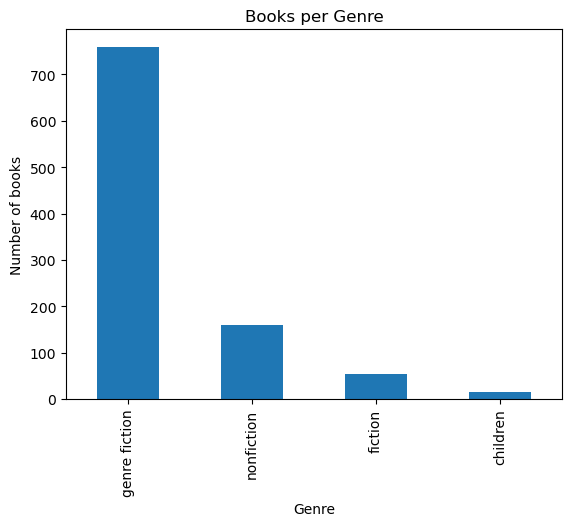

In [13]:
data["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of books")
plt.title("Books per Genre")
plt.show()

In [14]:
#this will show us the mean of average book rating for each author
data.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

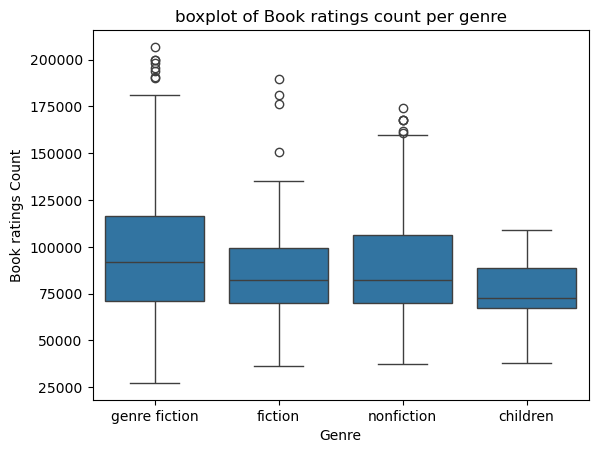

In [15]:
sns.boxplot(x="genre",y="Book_ratings_count",data=data)
plt.xlabel("Genre")
plt.ylabel("Book ratings Count")
plt.title("boxplot of Book ratings count per genre")
plt.show()

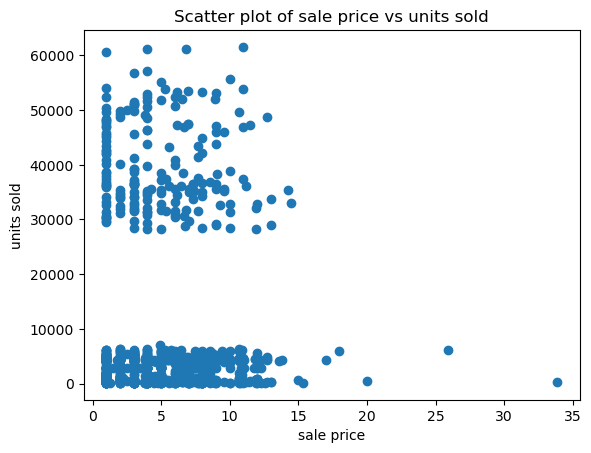

In [16]:
plt.scatter(data["sale price"],data["units sold"])
plt.xlabel("sale price")
plt.ylabel("units sold")
plt.title("Scatter plot of sale price vs units sold")
plt.show()

In [17]:
languagecont=data["language_code"].value_counts()
#gives the unique value counts of each lang code

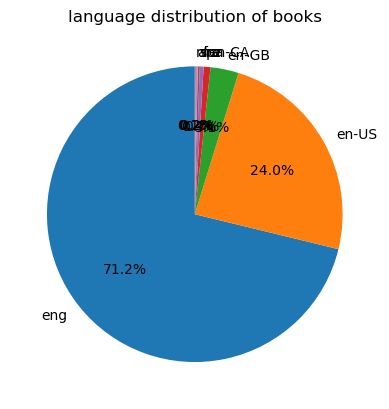

In [18]:
plt.pie(languagecont,labels=languagecont.index,startangle=90,autopct="%1.1f%%")
plt.title("language distribution of books")
plt.show()

In [19]:
data.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [20]:
data.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)
#shows the total publisher revenue of each publisher in decreasing order

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [21]:
data.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False)
#shows the mean of total book rating count for each author rating category  

Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

In [22]:
data.groupby("language_code").size().sort_values(ascending=False)
#shows the size of each lang code

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [23]:
data.groupby("Author_Rating")["Book_ratings_count"].var()
#shows variance of book ratings count for each category of author ratings 

Author_Rating
Excellent       4.419857e+08
Famous          1.227555e+09
Intermediate    1.170331e+09
Novice          9.523157e+08
Name: Book_ratings_count, dtype: float64

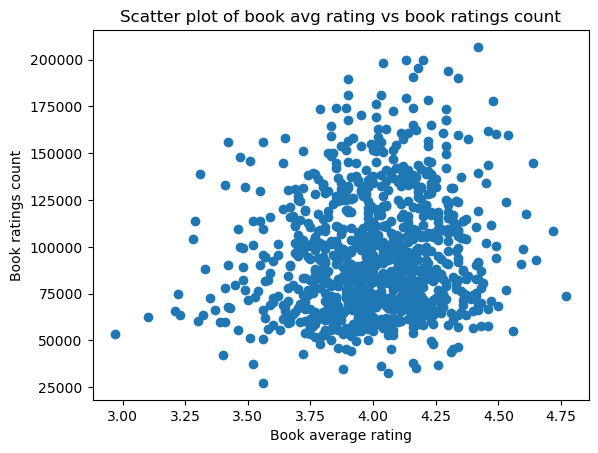

In [24]:
plt.scatter(data["Book_average_rating"],data["Book_ratings_count"])
plt.xlabel("Book average rating")
plt.ylabel("Book ratings count")
plt.title("Scatter plot of book avg rating vs book ratings count")
plt.show()
#shows most ratings done are around 4

In [25]:
total_gross_salesby_author=data.groupby("Author")["gross sales"].sum()

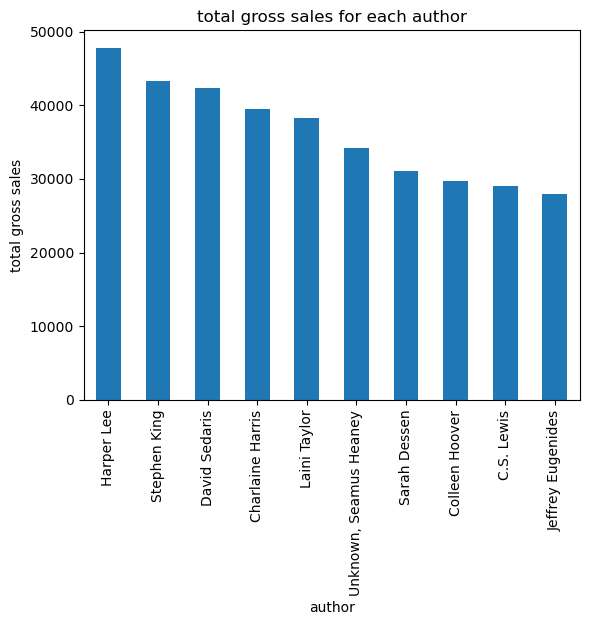

In [26]:
total_gross_salesby_author.sort_values(ascending=False).head(10).plot(kind="bar")
plt.xlabel("author")
plt.ylabel("total gross sales")
plt.title("total gross sales for each author")
plt.show()

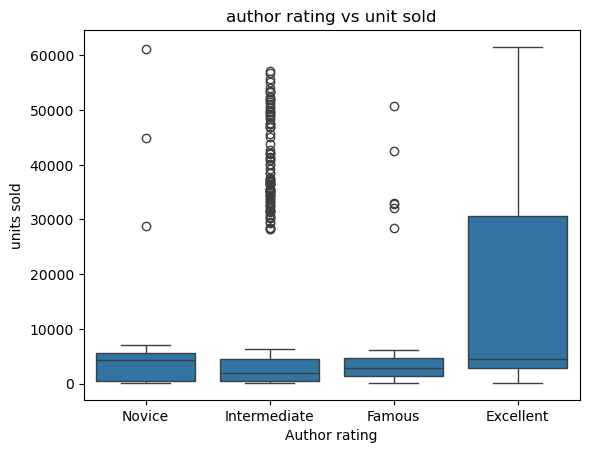

In [27]:
sns.boxplot(x="Author_Rating",y="units sold",data=data)
plt.xlabel("Author rating")
plt.ylabel("units sold")
plt.title("author rating vs unit sold")
plt.show()

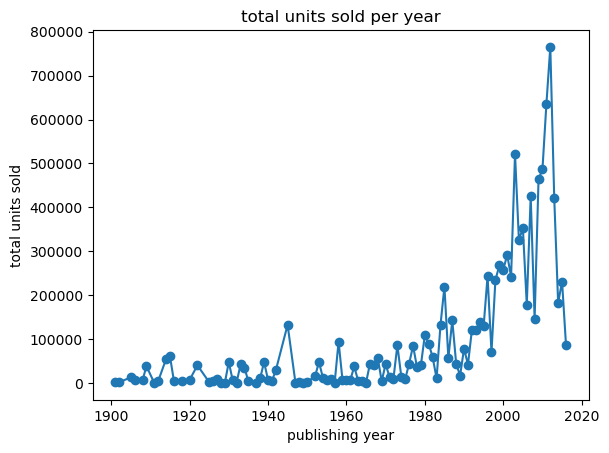

In [28]:
#this will show a line chart of total unitsold per publishing year 
data.groupby("Publishing Year")["units sold"].sum().plot(kind="line",marker="o")
plt.xlabel("publishing year")
plt.ylabel("total units sold")
plt.title("total units sold per year")
plt.show()